<a href="https://colab.research.google.com/github/SitiZumarohdf/PCVK_Genap_2023/blob/main/Week_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

#Accessing my Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

## TUGAS PRAKTIKUM 

1. Membuat Gamma Correction

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


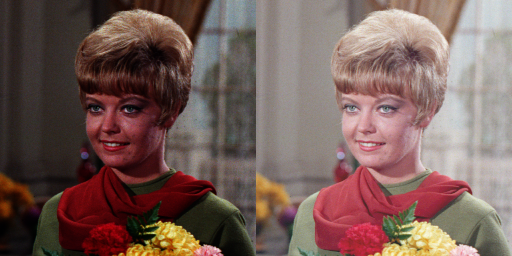

In [3]:
print(' Gamma Correction pada citra ') 
print('----------------------------------') 
try: 
 gamma = int(input('Masukkan nilai Gamma: ')) 
except ValueError: 
 print('Error, not a number') 
original = cv.imread('/content/drive/MyDrive/PCVK/Image/female.tiff')

invGamma = 1 / gamma
#Variabel invGamma digunakan untuk menghitung nilai invers dari gamma

#table digunakan untuk membuat tabel transformasi piksel 
#dengan menghitung nilai gamma untuk setiap nilai piksel dalam rentang 0 hingga 255.
table = np.array([((i / 255.0) ** invGamma) * 255
    for i in np.arange(0, 256)]).astype("uint8")
adjusted = cv.LUT(original, table)
#adjusted digunakan untuk menerapkan transformasi pada citra 
#menggunakan tabel transformasi yang telah dibuat sebelumnya.
final_frame = cv.hconcat((original, adjusted))
cv2_imshow(final_frame)

 Gamma Correction pada citra 
-------------------------------
Masukkan nilai Gamma: 3


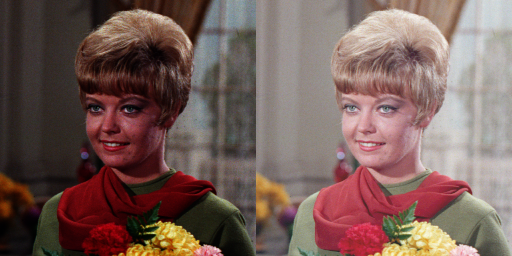

In [4]:
print(' Gamma Correction pada citra ')
print('-------------------------------')
try: 
 gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
 print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/Image/female.tiff')
gamma_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      gamma_image[y,x,c] = np.clip(255 * pow  (original[y,x,c] / 255, (1 / gamma)), 0, 255)

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

2. membuat Simulasi Image Depth

 Simulasi Image Depth  
--------------------------
Masukkan nilai Bit Depth: 2


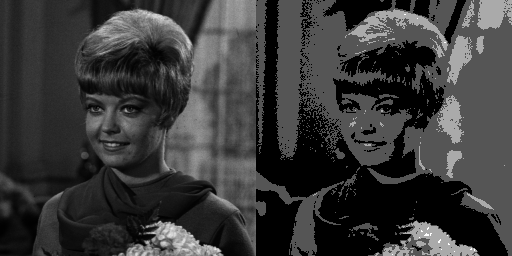

In [6]:
print(' Simulasi Image Depth  ')
print('--------------------------')
try:
  bd = float(input('Masukkan nilai Bit Depth: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/Image/female.tiff', cv.IMREAD_GRAYSCALE)
gamma_image = np.zeros(original.shape, original.dtype)

bit = 2**bd
level = 255 / (bit - 1)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    #for c in range(original.shape[2]):
     gamma_image[y,x] = np.clip(round(original[y,x] / level) * level, 0, 255);

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

3. Membuat Modul Average Denoising

Nilai PSNR Average 5  adalah 27.551461157006948 (dB)


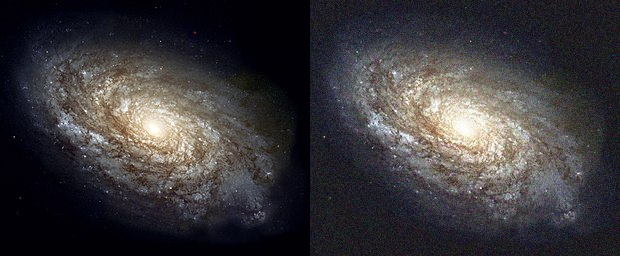

In [7]:
# 1. Jumlah Citra di Average - 5

import glob
from math import log10, sqrt

original = cv.imread('/content/drive/MyDrive/PCVK/Image/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/Image/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

dst = cv_img[0]
noise_number = 4 
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):  
      return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR Average 5  adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Nilai PSNR Average 30 adalah 27.52538061421543 (dB)


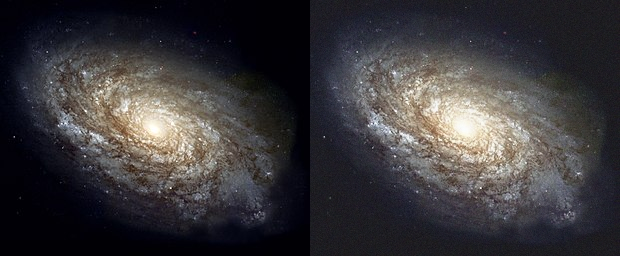

In [8]:
# 2. Jumlah Citra di Average - 30

dst = cv_img[0]
noise_number = 29
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):  
      return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR Average 30 adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Nilai PSNR Average 60 adalah 27.492806506220248 (dB)


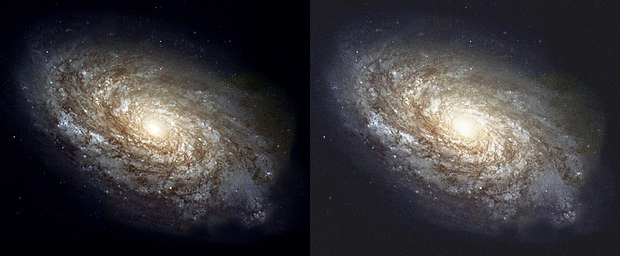

In [9]:
# 3. Jumlah Citra di Average - 60

dst = cv_img[0]
noise_number = 59
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):  
      return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR Average 60 adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Nilai PSNR Average 80 adalah 27.505918686500692 (dB)


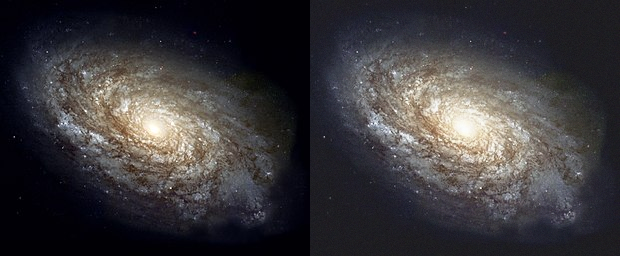

In [10]:
# 4. Jumlah Citra di Average - 80

dst = cv_img[0]
noise_number = 79
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):  
      return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR Average 80 adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Nilai PSNR Average 100 adalah 27.506819047302912 (dB)


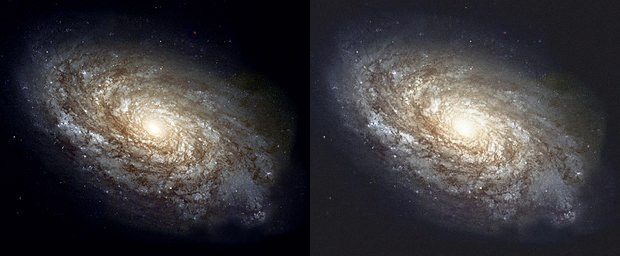

In [11]:
# 5. Jumlah Citra di Average - 100

dst = cv_img[0]
noise_number = 99
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):  
      return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR Average 100 adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Buat image masking untuk image berikut. Image kiri adalah image asli (images/couple.tiff), 
sedangkan image paling kanan adalah hasilnya: 

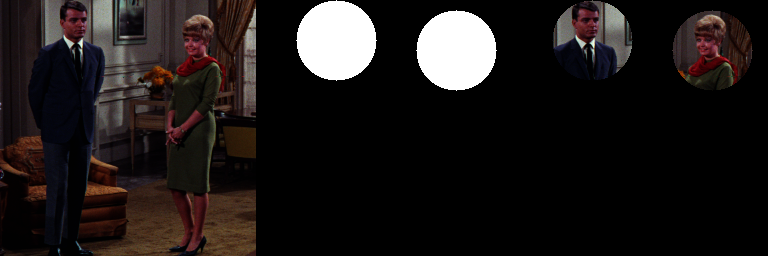

In [12]:
#Operator AND
img_couple = cv.imread('/content/drive/MyDrive/PCVK/Image/couple.tiff')

mask = np.zeros(img_couple.shape, dtype=np.uint8)
mask = cv.circle(mask, (80, 40), 40, (255,255,255), -1)

result = img_couple & mask

mask1 = cv.circle(mask, (200, 50), 40, (255,255,255), -1)

result = img_couple & mask1

final_frame = cv.hconcat((img_couple, mask, result))
cv2_imshow(final_frame)

5. image masking untuk image couple.tiff menggunakan operator lain


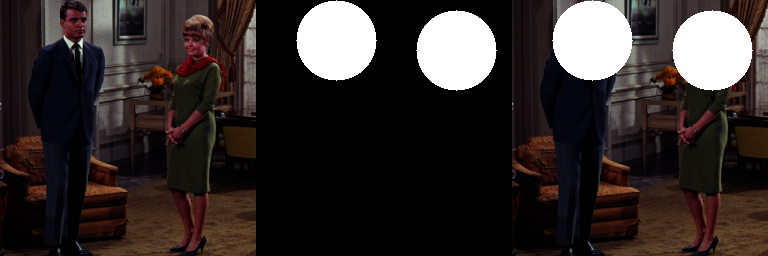

In [13]:
#Operator OR
img_couple = cv.imread('/content/drive/MyDrive/PCVK/Image/couple.tiff')

mask = np.zeros(img_couple.shape, dtype=np.uint8)
mask = cv.circle(mask, (80, 40), 40, (255,255,255), -1)

result = img_couple | mask  # menggunakan operator bitwise OR

mask1 = cv.circle(mask, (200, 50), 40, (255,255,255), -1)

result = img_couple | mask1  # menggunakan operator bitwise OR

final_frame = cv.hconcat((img_couple, mask, result))
cv2_imshow(final_frame)

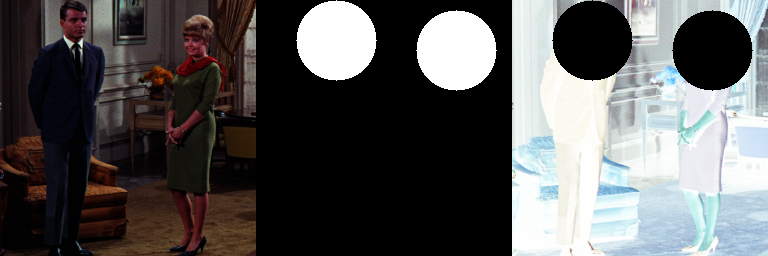

In [14]:
#Operator NOT
img_couple = cv.imread('/content/drive/MyDrive/PCVK/Image/couple.tiff')

mask = np.zeros(img_couple.shape, dtype=np.uint8)
mask = cv.circle(mask, (80, 40), 40, (255,255,255), -1)

result = ~img_couple & ~mask  # menggunakan operator bitwise NOT

mask1 = cv.circle(mask, (200, 50), 40, (255,255,255), -1)

result = ~img_couple & ~mask1  # menggunakan operator bitwise NOT

final_frame = cv.hconcat((img_couple, mask, result))
cv2_imshow(final_frame)

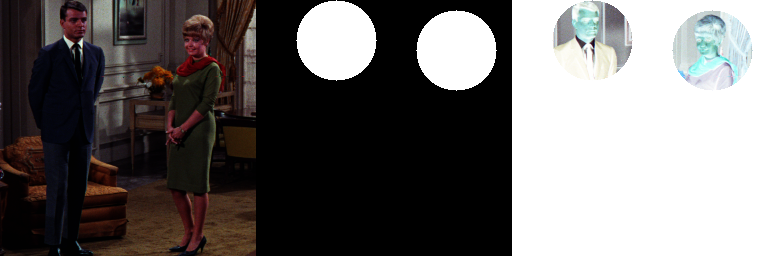

In [15]:
#Operator NAND
img_couple = cv.imread('/content/drive/MyDrive/PCVK/Image/couple.tiff')

mask = np.zeros(img_couple.shape, dtype=np.uint8)
mask = cv.circle(mask, (80, 40), 40, (255, 255, 255), -1)

result = ~(img_couple & mask)  # menggunakan operator bitwise NAND

mask1 = cv.circle(mask, (200, 50), 40, (255, 255, 255), -1)

result = ~(img_couple & mask1)  # menggunakan operator bitwise NAND

final_frame = cv.hconcat((img_couple, mask, result))
cv2_imshow(final_frame)

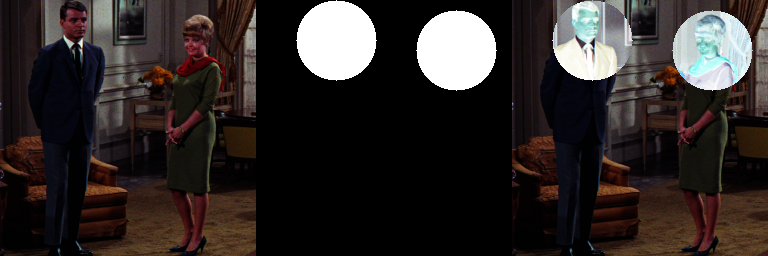

In [16]:
#Operator XOR
img_couple = cv.imread('/content/drive/MyDrive/PCVK/Image/couple.tiff')

mask = np.zeros(img_couple.shape, dtype=np.uint8)
mask = cv.circle(mask, (80, 40), 40, (255, 255, 255), -1)

result = img_couple ^ mask  # menggunakan operator bitwise XOR pada gambar input dan mask

mask1 = cv.circle(mask, (200, 50), 40, (255, 255, 255), -1)

result = img_couple ^ mask1  # menggunakan operator bitwise XOR pada gambar input dan mask1

final_frame = cv.hconcat((img_couple, mask, result))
cv2_imshow(final_frame)